In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the similarity CSV
df = pd.read_csv("../../edges_calculation/cosine_similarity/results/avg_cosine_similarity_matrix.csv", index_col=0)

# Create a graph
G = nx.Graph()

# Add edges based on similarity values (excluding self-similarity)
for i in df.index:
    for j in df.columns:
        if i != j:
            similarity = df.loc[i, j]
            G.add_edge(i, j, weight=similarity)


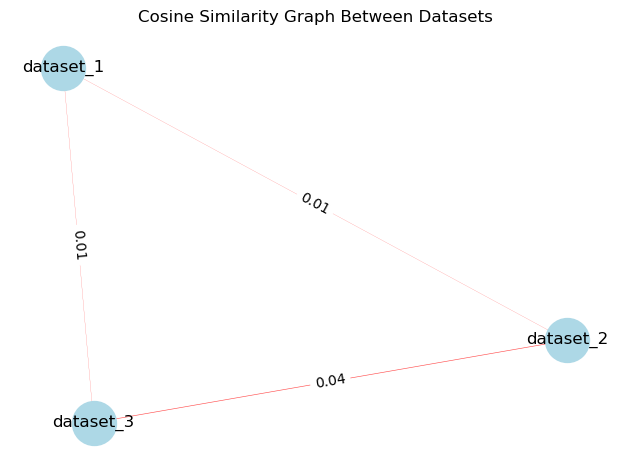

In [6]:
# Draw graph
pos = nx.spring_layout(G, seed=42)  # force-directed layout

# Edge weights: scale for thickness
weights = [G[u][v]['weight'] * 10 for u, v in G.edges()]  # Increased multiplier for bolder lines

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=12)

# Make edges red and bold
nx.draw_networkx_edges(G, pos, width=weights, edge_color='red', alpha=0.7)

# Add edge labels (similarity scores)
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Cosine Similarity Graph Between Datasets")
plt.axis('off')
plt.tight_layout()
plt.savefig("cosine_similarity_graph.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>